#  International Powerlifting Federation Analysis 
## Background: 
The International Powerlifting Federation is one of the most recognized Powerlifting Organizations in the world.
Since 1992, the IPF has held the Masters Powerlifting Championship every year. Athelets are divided into divisions based on their historical performance and weight classes in their respective divisons based on body weight. Athletes will have 3 attempts at the following lifts, with the goal to lift as much weight as possible: Squat, Bench Press, and Deadlift. From there, the athlete with the highest Total will be the winner of their weight class in their division. 
Worth noting: starting in 2011, new weight classes were used and there were now 4 Divisions instead of 3. 
## Data Collection: 
Data was collected from the historical scoresheets from IPF's website. Data was taken for the 'Master' class and results were taken for Men. Men and Women have different weight classes year by year, and picking Men prevented issues in terms of overlapping weight classes. 
Data was collected through 2005. Prior to 2005, the data sheets were created differently, and this method provided the most consistency. 
## Hypothesis: 
One of the reasons for establishing weight classes, was to create division and drive home the idea that 'More Body Weight helps lift more weight.' These weight classes let people of lower body weight have the ability to compete and not worry about people who have a large weight advantage. I believe the relationship between body weight and weight lifted is a linear relationship. Therefore, we have an inverse. 
If the weight classes were designed with an idea of fairness and creating true separation between weight classes, we should be able to accurately predict, to a certain degree, the weight class of an athlete, based on their records for the individual meet. 
### Notes:
All predictions will be made using kNN 
More info on the IPF can be found here: https://www.powerlifting.sport/ 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')  

In [2]:
def kNN_Model(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    neighbors = limits(X_train, X_test, y_train, y_test)
    
    classifier = KNeighborsClassifier(n_neighbors=neighbors)
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [3]:
def limits(X_train, X_test, y_train, y_test):
    error = []
    neighbors = 1 
    error_val = 1 
    # Calculating error for K values between 1 and 100
    for i in range(1, 100):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error.append(np.mean(pred_i != y_test))
        if error[i-1] < error_val:
            error_val = error[i-1]
            neighbors = i 
    return neighbors

In [4]:
def standard_map(df, x, y):
    plt.scatter(df[x],  df[y])
    Title = x + ' vs ' + y
    plt.title(Title)
    xaxis = x + ' (Kg)' 
    plt.xlabel(xaxis)
    yaxis = y + ' (Kg)'
    plt.ylabel(yaxis)
    plt.show
    

In [5]:
source = "IPF_History.xlsx"
df = pd.read_excel(source)

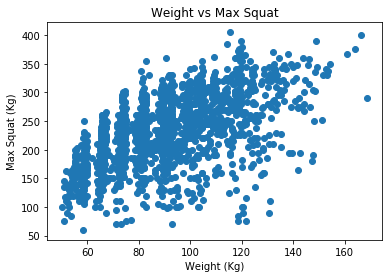

In [6]:
standard_map(df, 'Weight', 'Max Squat')

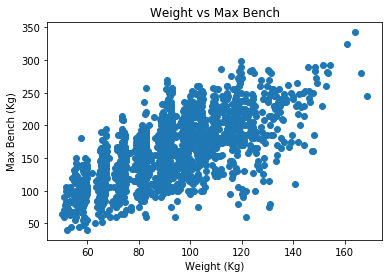

In [7]:
standard_map(df, 'Weight', 'Max Bench')

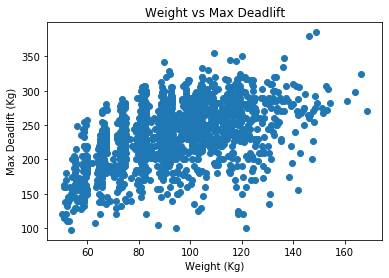

In [8]:
standard_map(df, 'Weight', 'Max Deadlift')

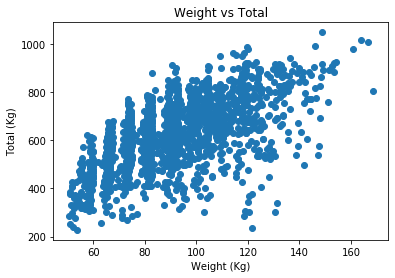

In [9]:
standard_map(df, 'Weight', 'Total')

In [10]:
X = df.iloc[:,5:9]
y = df.iloc[:,2]
kNN_Model(X, y)

              precision    recall  f1-score   support

      120+kg       0.00      0.00      0.00         1
       100kg       0.14      0.15      0.15        26
       105kg       0.12      0.20      0.15        35
       110kg       0.00      0.00      0.00        20
      120+kg       0.58      0.39      0.47        18
       120kg       0.12      0.16      0.13        19
      125+kg       0.00      0.00      0.00         9
       125kg       0.10      0.07      0.08        15
        52kg       0.00      0.00      0.00         2
        56kg       0.00      0.00      0.00        10
        59kg       0.39      0.70      0.50        10
        60kg       0.18      0.25      0.21         8
        66kg       0.38      0.47      0.42        19
      67.5kg       0.12      0.14      0.13        14
        74kg       0.28      0.36      0.31        28
        75kg       0.18      0.21      0.20        19
      82.5kg       0.29      0.29      0.29        24
        83kg       0.17    

In [11]:
X = df.iloc[0:1051,5:9]
y = df.iloc[0:1051,2]
kNN_Model(X, y)

              precision    recall  f1-score   support

       105kg       0.30      0.34      0.32        29
      120+kg       0.25      0.25      0.25        12
       120kg       0.22      0.19      0.20        26
        59kg       0.50      0.46      0.48        13
        66kg       0.55      0.39      0.46        28
        74kg       0.31      0.43      0.36        30
        83kg       0.32      0.28      0.30        36
        93kg       0.21      0.22      0.21        37

    accuracy                           0.31       211
   macro avg       0.33      0.32      0.32       211
weighted avg       0.32      0.31      0.31       211



In [12]:
X = df.iloc[1052:1891,5:9]
y = df.iloc[1052:1891,2]
kNN_Model(X, y)

              precision    recall  f1-score   support

       100kg       0.23      0.30      0.26        23
       110kg       0.25      0.15      0.19        26
      125+kg       0.67      0.29      0.40         7
       125kg       0.36      0.33      0.34        15
        56kg       0.55      0.75      0.63         8
        60kg       0.44      0.57      0.50         7
      67.5kg       0.39      0.44      0.41        16
        75kg       0.29      0.28      0.29        25
      82.5kg       0.20      0.35      0.26        17
        90kg       0.31      0.17      0.22        24

    accuracy                           0.31       168
   macro avg       0.37      0.36      0.35       168
weighted avg       0.32      0.31      0.30       168



In [13]:
X = df.iloc[0:1051,5]
y = df.iloc[0:1051,2]
X = X.to_frame()
kNN_Model(X,y)

              precision    recall  f1-score   support

      120+kg       0.00      0.00      0.00         1
       105kg       0.27      0.38      0.32        32
      120+kg       0.31      0.27      0.29        15
       120kg       0.00      0.00      0.00        28
        59kg       0.19      0.67      0.30         6
        66kg       0.25      0.27      0.26        15
        74kg       0.37      0.36      0.37        36
        83kg       0.30      0.33      0.31        40
        93kg       0.29      0.29      0.29        38

    accuracy                           0.29       211
   macro avg       0.22      0.28      0.24       211
weighted avg       0.26      0.29      0.27       211



In [14]:
X = df.iloc[1052:1891,5]
y = df.iloc[1052:1891,2]
X = X.to_frame()
kNN_Model(X, y)

              precision    recall  f1-score   support

       100kg       0.14      0.21      0.17        19
       110kg       0.15      0.17      0.16        18
      125+kg       0.75      0.25      0.38        12
       125kg       0.00      0.00      0.00        15
        52kg       0.00      0.00      0.00         3
        56kg       0.43      0.43      0.43         7
        60kg       0.20      0.67      0.31         9
      67.5kg       0.42      0.31      0.36        16
        75kg       0.31      0.38      0.34        24
      82.5kg       0.36      0.19      0.24        27
        90kg       0.16      0.17      0.16        18

    accuracy                           0.24       168
   macro avg       0.26      0.25      0.23       168
weighted avg       0.27      0.24      0.24       168



In [15]:
X = df.iloc[0:1051,5:8]
y = df.iloc[0:1051,2]
kNN_Model(X, y)

X = df.iloc[1052:1891,5:8]
y = df.iloc[1052:1891,2]
kNN_Model(X, y)

              precision    recall  f1-score   support

      120+kg       0.00      0.00      0.00         1
       105kg       0.47      0.49      0.48        37
      120+kg       0.67      0.35      0.46        17
       120kg       0.43      0.24      0.31        25
        59kg       0.21      0.33      0.26         9
        66kg       0.34      0.40      0.37        25
        74kg       0.34      0.46      0.39        28
        83kg       0.31      0.28      0.29        39
        93kg       0.15      0.17      0.16        30

    accuracy                           0.34       211
   macro avg       0.33      0.30      0.30       211
weighted avg       0.36      0.34      0.34       211

              precision    recall  f1-score   support

       100kg       0.39      0.48      0.43        27
       110kg       0.27      0.24      0.25        17
      125+kg       0.25      0.11      0.15         9
       125kg       0.56      0.36      0.43        14
        52kg       0.50 

In [16]:
X = df.iloc[:,4:9]
y = df.iloc[:,1]
kNN_Model(X, y)

              precision    recall  f1-score   support

           1       0.63      0.66      0.65       137
           2       0.47      0.38      0.42       112
           3       0.59      0.72      0.65       107
           4       0.27      0.17      0.21        23

    accuracy                           0.56       379
   macro avg       0.49      0.48      0.48       379
weighted avg       0.55      0.56      0.55       379



In [17]:
X = df.iloc[0:1051,4:9]
y = df.iloc[0:1051,1]
kNN_Model(X, y)

              precision    recall  f1-score   support

           1       0.67      0.72      0.69        71
           2       0.58      0.49      0.53        63
           3       0.64      0.65      0.65        49
           4       0.66      0.75      0.70        28

    accuracy                           0.64       211
   macro avg       0.64      0.65      0.64       211
weighted avg       0.64      0.64      0.64       211

